<a href="https://colab.research.google.com/github/ajju0507/CAD-exp8/blob/main/dlallfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Experiment 1 - Implementation of XOR Gate using Backpropagation in Neural Network
import numpy as np

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and output
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

# Initialize weights and biases randomly
np.random.seed(42)
inputLayerNeurons = 2
hiddenLayerNeurons = 2
outputNeurons = 1

# Weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
hidden_bias = np.random.uniform(size=(1, hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputNeurons))
output_bias = np.random.uniform(size=(1, outputNeurons))

# Learning rate
lr = 0.1
epochs = 10000

# Training the neural network
for _ in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    final_input = np.dot(hidden_layer_output, output_weights) + output_bias
    final_output = sigmoid(final_input)

    # Backpropagation
    error = y - final_output
    d_output = error * sigmoid_derivative(final_output)

    error_hidden = d_output.dot(output_weights.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    output_weights += hidden_layer_output.T.dot(d_output) * lr
    output_bias += np.sum(d_output, axis=0, keepdims=True) * lr
    hidden_weights += X.T.dot(d_hidden) * lr
    hidden_bias += np.sum(d_hidden, axis=0, keepdims=True) * lr

# Final Output
print("Final Output after training:")
print(np.round(final_output, 3))

In [ ]:
#Experiment 2 - To Explore all deep learning libraries e.g.Theano, Tensor Flow,Lasagne , Keras MXNet etc
#1 - Tensorflow
import tensorflow as tf
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=25, verbose=2)

print("Output:", model.predict(X).round())

In [ ]:
#Experiment 2
#2 - Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, verbose=0)
print("Output:", model.predict(X).round())

In [ ]:
#Experiment 2
#3 - Pytorch
import torch
import torch.nn as nn
import torch.optim as optim
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)
model = nn.Sequential(
nn.Linear(2, 2),
nn.Sigmoid(),
nn.Linear(2, 1),
nn.Sigmoid()
)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
for epoch in range(500):
  optimizer.zero_grad()
  output = model(X)
  loss = criterion(output, y)
  loss.backward()
  optimizer.step()
  print("Output:", torch.round(model(X)))

In [ ]:
#1. Install Requirements
!pip install tensorflow pandas scikit-learn


In [ ]:
#2. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

#3. Load Dataset
df = pd.read_csv("train.csv")
# Features and Labels
X = df.drop("price_range", axis=1)
y = df["price_range"]

#4. Preprocess Data
# One-hot encode labels (price_range: 0 to 3)
y = to_categorical(y, num_classes=4)
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
random_state=42)

#5. Design Neural Network (Keras Sequential API)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax')) # 4 classes (0 to 3)

#6. Compile and Train the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

#7. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 81ms/step - accuracy: 0.3249 - loss: 1.8222 - val_accuracy: 0.5466 - val_loss: 1.2744
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.5534 - loss: 1.2472 - val_accuracy: 0.5838 - val_loss: 1.1565
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.6182 - loss: 1.0769 - val_accuracy: 0.6353 - val_loss: 1.0313
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 86ms/step - accuracy: 0.6583 - loss: 0.9759 - val_accuracy: 0.6470 - val_loss: 0.9821
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.6785 - loss: 0.9136 - val_accuracy: 0.6696 - val_loss: 0.9459
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.7063 - loss: 0.8366 - val_accuracy: 0.6863 - val_loss: 0.8941
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 79ms/step - accuracy: 0.7238 - loss: 0.7903 - val_accuracy: 0.6862 - val_loss: 0.9055
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7430 - loss: 0.7345 -

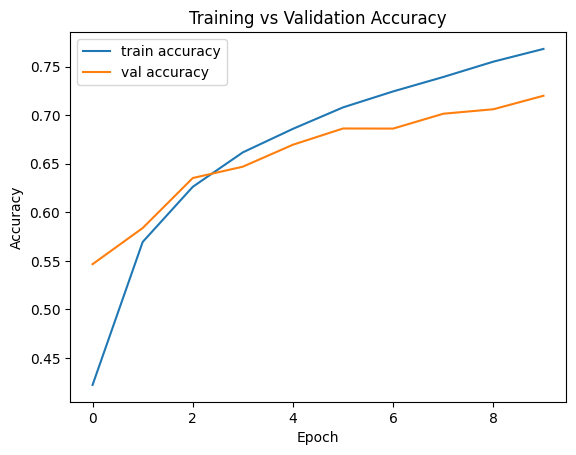

In [ ]:
#4 - To design and implement a CNN for Multiclass Object classification on image data
#1. Install Required Packages
!pip install tensorflow matplotlib

#2. Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#3. Load and Preprocess CIFAR-10 Dataset
# Load data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# Normalize pixel values (0-255) to (0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0
# Convert labels to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#4. Build the CNN Model
model = models.Sequential()
# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Convolutional Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 classes

#5. Compile and Train the Model
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,
          validation_data=(X_test, y_test),
          batch_size=64)

#6. Evaluate and Plot Results
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [ ]:
#Experiment 5 - To implement transfer learning for neuralnetwork
#1. Install Required Packages
!pip install tensorflow

#2. Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

#3. Load and Preprocess Data
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Resize images to 96x96 to match MobileNetV2 input
x_train = tf.image.resize(x_train, (96, 96)) / 255.0
x_test = tf.image.resize(x_test, (96, 96)) / 255.0
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#4. Load Pretrained Model (MobileNetV2)
base_model = MobileNetV2(input_shape=(96, 96, 3),
        include_top=False,
        weights='imagenet')
base_model.trainable = False # Freeze base layers
#5. Add Custom Classification Layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') # 10 CIFAR classes
])

#6. Compile and Train Model
model.compile(optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64,
      validation_data=(x_test, y_test))

#7. Optional: Fine-Tune Top Layers
#After initial training, unfreeze top layers of MobileNetV2 and retrain with a low learning rate:
base_model.trainable = True

# Recompile with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
# Fine-tune
model.fit(x_train, y_train, epochs=5, batch_size=64,
        validation_data=(x_test, y_test))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 391s 490ms/step - accuracy: 0.5989 - loss: 1.1863 - val_accuracy: 0.7728 - val_loss: 0.6325
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 463s 517ms/step - accuracy: 0.7489 - loss: 0.7311 - val_accuracy: 0.7972 - val_loss: 0.5902
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 443s 519ms/step - accuracy: 0.7701 - loss: 0.6722 - val_accuracy: 0.8034 - val_loss: 0.5691
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 438s 514ms/step - accuracy: 0.7773 - loss: 0.6359 - val_accuracy: 0.8042 - val_loss: 0.5598
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 488ms/step - accuracy: 0.7877 - loss: 0.6184 - val_accuracy: 0.8039 - val_loss: 0.5672
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1687s 2s/step - accuracy: 0.6629 - loss: 1.2502 - val_accuracy: 0.8136 - val_loss: 0.5804
Epoch 2/5
768/782 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8258 - loss: 0.5553